In [1]:
import pandas as pd 
#导入pandas包，并重命名为pd。

In [2]:
col_names = ['RM', 'LSTAT', 'PTRATIO', 'MEDV']
#通过查阅housing.csv文件，给出每个特征列的名称。
data = pd.read_csv('data/housing.csv', names=col_names)
#采用read_csv函数读取housing.csv文件，默认用逗号分隔数据；并存入变量data。

In [3]:
data
#展示data的数据信息。

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000
1,6.421,9.14,17.8,453600
2,7.185,4.03,17.8,728700
3,6.998,2.94,18.7,701400
4,7.147,5.33,18.7,760200
...,...,...,...,...
484,6.593,9.67,21.0,470400
485,6.120,9.08,21.0,432600
486,6.976,5.64,21.0,501900
487,6.794,6.48,21.0,462000


In [4]:
data.shape
#展示data的数据个数与维度个数（489组数据，有4个维度的特征）

(489, 4)

In [5]:
data.info()
#展示data各个特征维度的信息

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489 entries, 0 to 488
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   RM       489 non-null    float64
 1   LSTAT    489 non-null    float64
 2   PTRATIO  489 non-null    float64
 3   MEDV     489 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 15.4 KB


In [6]:
from sklearn.model_selection import train_test_split
# 从 sklearn.model_selection导入train_test_split。

X = data[col_names[0:-1]]
y = data[col_names[-1]]
#将前3列选为特征,将MEDV命名的列取出作为待预测的列。

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2019)
#分割出25%的数据作为测试集，剩下75%的数据作为训练样本。

In [7]:
from sklearn.preprocessing import StandardScaler
# 从 sklearn.preprocessing导入StandardScaler，对X进行标准化处理。
ss = StandardScaler()

X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [8]:
X_train

array([[ 0.05660961,  0.59503956,  0.76425532],
       [-0.34548984, -0.72470757,  0.48156967],
       [ 0.32991157,  0.57435387,  0.76425532],
       ...,
       [ 0.39116891, -0.767458  , -1.82702976],
       [-1.98058953,  2.62499544,  0.76425532],
       [-0.30779301, -1.02533963,  0.29311257]])

In [9]:
X_train.shape

(366, 3)

In [10]:
X_test

array([[-0.10674329,  0.30543988,  0.76425532],
       [-0.21040956, -0.20342814,  0.76425532],
       [-2.52719347,  2.11336933,  0.76425532],
       [-1.08528999,  1.11218185,  1.14116951],
       [ 1.28489776, -1.0005168 , -0.36648726],
       [-1.03031546,  0.75914605,  0.2459983 ],
       [-0.74601858,  0.16477717, -0.31937299],
       [ 1.12154486, -1.15772805, -0.74340146],
       [ 1.09327224, -1.2997698 ,  0.2459983 ],
       [ 1.22521112, -1.13290522, -1.77991549],
       [-0.87167466, -0.07241876, -0.79051573],
       [ 0.45713835, -1.26805174, -0.55494436],
       [ 1.55191692, -1.1232519 , -0.31937299],
       [ 0.3676084 , -0.02139405,  1.14116951],
       [ 0.27807844, -1.29149553,  0.2459983 ],
       [-0.96277531,  0.15788194,  0.76425532],
       [-0.64549372, -0.57714964,  0.29311257],
       [ 0.59850144, -0.4502774 , -1.0260871 ],
       [-0.1193089 ,  0.71363753,  0.76425532],
       [-0.18370764, -0.53302016, -0.79051573],
       [ 0.73201102, -0.48751164,  1.094

In [11]:
X_test.shape

(123, 3)

## 方法1 LinearRegression

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# 从sklearn.linear_model导入LinearRegression。
# 从sklearn.metrics导入mean_absolute_error, mean_squared_error, r2_score用来评估模型预测的可靠度。


lr = LinearRegression()
# 初始化模型。
lr.fit(X_train, y_train)
# 模型训练。
y1_predict = lr.predict(X_test)
# 预测的类别结果存入y_predict。
score1 = r2_score(y_test, y1_predict)

print (mean_absolute_error(y_test, y1_predict))
print (mean_squared_error(y_test, y1_predict))
print (r2_score(y_test, y1_predict))

63405.76473875027
7640132624.722741
0.653132303467161


## 方法2 KNeighborsRegressor

In [13]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()

knr.fit(X_train, y_train)

y2_predict = knr.predict(X_test)

print (mean_absolute_error(y_test, y2_predict))
print (mean_squared_error(y_test, y2_predict))
print (r2_score(y_test, y2_predict))

50577.560975609755
4235143141.4634147
0.8077213553580718


## 方法3 DecisionTreeRegressor

In [14]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()

dtr.fit(X_train, y_train)

y3_predict = dtr.predict(X_test)

print (mean_absolute_error(y_test, y3_predict))
print (mean_squared_error(y_test, y3_predict))
print (r2_score(y_test, y3_predict))

66568.29268292683
7745358292.682927
0.6483549799762873


## 方法4 RandomForestRegressor

In [15]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()

rfr.fit(X_train, y_train)

y4_predict = rfr.predict(X_test)

print (mean_absolute_error(y_test, y4_predict))
print (mean_squared_error(y_test, y4_predict))
print (r2_score(y_test, y4_predict))

49177.560975609755
4241653986.585366
0.807425758153041


## 方法5 GradientBoostingRegressor

In [16]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor()

gbr.fit(X_train, y_train)

y5_predict = gbr.predict(X_test)

print (mean_absolute_error(y_test, y5_predict))
print (mean_squared_error(y_test, y5_predict))
print (r2_score(y_test, y5_predict))

48595.59779609193
4100959316.1789236
0.8138134007026492


## 方法6 MLPRegressor 

In [17]:
from sklearn.neural_network import MLPRegressor 

mlpr = MLPRegressor(hidden_layer_sizes=(200, 10), max_iter=5000)

mlpr.fit(X_train, y_train)

y6_predict = mlpr.predict(X_test)

print (mean_absolute_error(y_test, y6_predict))
print (mean_squared_error(y_test, y6_predict))
print (r2_score(y_test, y6_predict))

54835.00369687002
4934992549.855128
0.775947672343307


D:\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  warnings.warn(


## 方法7 LogisticRegression

In [18]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train, y_train)

y7_predict = lr.predict(X_test)
y7_predict_prob = lr.predict_proba(X_test)

print (mean_absolute_error(y_test, y7_predict))
print (mean_squared_error(y_test, y7_predict))
print (r2_score(y_test, y7_predict))

73363.41463414633
9067856341.463415
0.5883125861616498


## 方法8 GradientBoostingClassifier

In [19]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()

gbc.fit(X_train, y_train)

y8_predict = gbc.predict(X_test)

print (mean_absolute_error(y_test, y8_predict))
print (mean_squared_error(y_test, y8_predict))
print (r2_score(y_test, y8_predict))

67490.24390243902
7816133414.634147
0.6451417368653483


In [20]:
s = (r2_score(y_test, y1_predict),r2_score(y_test, y2_predict),r2_score(y_test, y3_predict),r2_score(y_test, y4_predict),r2_score(y_test, y5_predict),r2_score(y_test, y6_predict),r2_score(y_test, y7_predict),r2_score(y_test, y8_predict),)

In [21]:
m = (1,2,3,4,5,6,7,8)

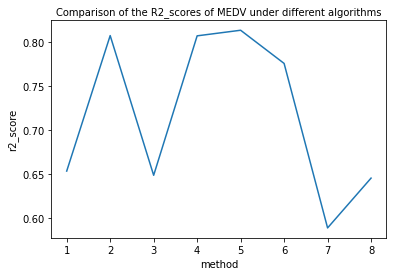

In [22]:
%matplotlib inline  
import matplotlib.pylab as pl
pl.xlabel('method')
pl.ylabel('r2_score')
pl.title('Comparison of the R2_scores of MEDV under different algorithms', fontsize=10)
pl.plot(m,s)
pl.show()

### 用GradientBoostingRegressor分别预测MEDV、PTRATIO、LSTAT、RM

In [23]:
X61 = data[['RM','LSTAT','PTRATIO']]
y61 = data['MEDV']

X61_train, X61_test, y61_train, y61_test = train_test_split(X61, y61, test_size=0.25, random_state=2019)



In [24]:
gbr.fit(X61_train, y61_train)

y61_predict = gbr.predict(X61_test)

print (mean_absolute_error(y61_test, y61_predict))
print (mean_squared_error(y61_test, y61_predict))
print (r2_score(y61_test, y61_predict))

48343.43770334503
4100236866.3401613
0.8138462004619913


In [25]:
X62 = data[['RM','LSTAT','MEDV']]
y62 = data['PTRATIO']
X62_train, X62_test, y62_train, y62_test = train_test_split(X62, y62, test_size=0.25, random_state=2019)

In [26]:
gbr.fit(X62_train, y62_train)

y62_predict = gbr.predict(X62_test)

print (mean_absolute_error(y62_test, y62_predict))
print (mean_squared_error(y62_test, y62_predict))
print (r2_score(y62_test, y62_predict))

1.4659155575110907
3.7797254785500356
0.10755695237808871


In [27]:
X63 = data[['RM','PTRATIO','MEDV']]
y63 = data['LSTAT']

X63_train, X63_test, y63_train, y63_test = train_test_split(X63, y63, test_size=0.25, random_state=2019)

In [28]:
gbr.fit(X63_train, y63_train)

y63_predict = gbr.predict(X63_test)

print (mean_absolute_error(y63_test, y63_predict))
print (mean_squared_error(y63_test, y63_predict))
print (r2_score(y63_test, y63_predict))

3.055618386128809
16.444992877606932
0.6132319137575765


In [29]:
X64 = data[[ 'LSTAT','PTRATIO','MEDV']]
y64 = data['RM']

X64_train, X64_test, y64_train, y64_test = train_test_split(X64, y64, test_size=0.25, random_state=2019)

In [30]:
gbr.fit(X64_train, y64_train)

y64_predict = gbr.predict(X64_test)

print (mean_absolute_error(y64_test, y64_predict))
print (mean_squared_error(y64_test, y64_predict))
print (r2_score(y64_test, y64_predict))

0.28116447250346277
0.16870393917708607
0.6099304714495681


In [31]:
s2 =  (r2_score(y61_test, y61_predict),r2_score(y62_test, y62_predict),r2_score(y63_test, y63_predict),r2_score(y64_test, y64_predict))

In [32]:
m2 = ('RM','LSTAT','PTRATIO','MEDV')

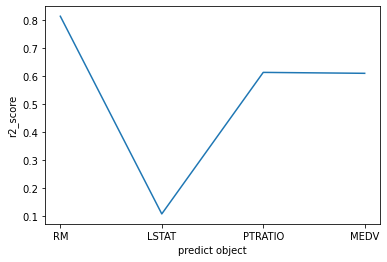

In [33]:
pl.xlabel('predict object')
pl.ylabel('r2_score')
pl.plot(m2,s2)
pl.show()